In [5]:
import pandas as pd

# Load the dataset (make sure to use the correct file path)
df = pd.read_csv('voice.csv')

# Check if the data is loaded correctly
print(df.head())


   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

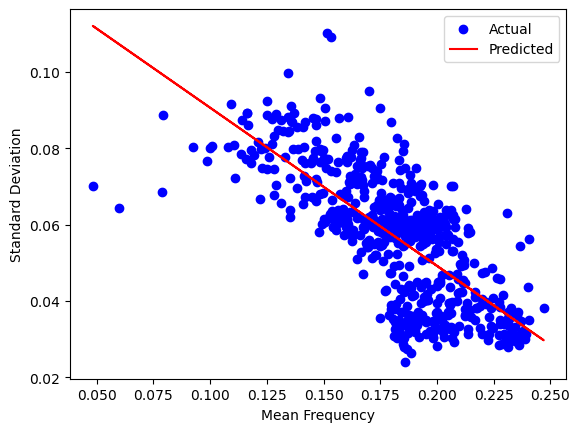

Mean Squared Error: 0.00013317534249564477
R-squared: 0.5094684369825522


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target
X = df[['meanfreq']]  # Replace with relevant feature
y = df['sd']  # Replace with relevant target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Mean Frequency')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


<ipython-input-9-93e0ae4945e6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['female', 'male'])  # Update according to your label names
<ipython-input-9-93e0ae4945e6>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['female', 'male'])


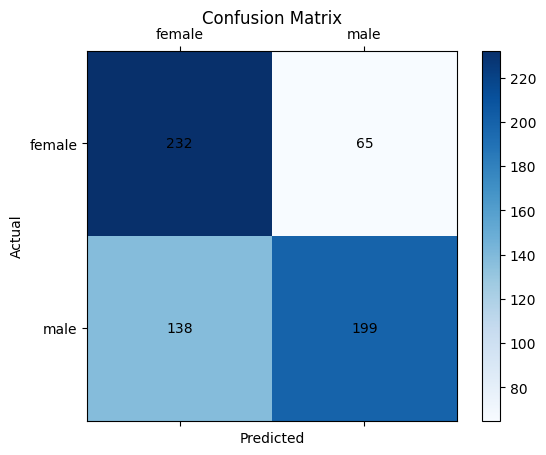

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

      female       0.63      0.78      0.70       297
        male       0.75      0.59      0.66       337

    accuracy                           0.68       634
   macro avg       0.69      0.69      0.68       634
weighted avg       0.69      0.68      0.68       634



In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('voice.csv')  # Make sure to replace with the correct path

# Select features and target
X = df[['meanfreq', 'sd', 'median']]  # Replace with actual columns
y = df['label']  # Target column for classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', pad=20)
plt.colorbar(cax)

# Label the axes
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Add x and y tick marks
ax.set_xticklabels([''] + ['female', 'male'])  # Update according to your label names
ax.set_yticklabels([''] + ['female', 'male'])

# Add text labels in the cells
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        ax.text(j, i, str(conf_matrix[i][j]), va='center', ha='center')

plt.show()

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


K-Means Inertia: 0.9902468168146251
Silhouette Score: 0.42108336455863854


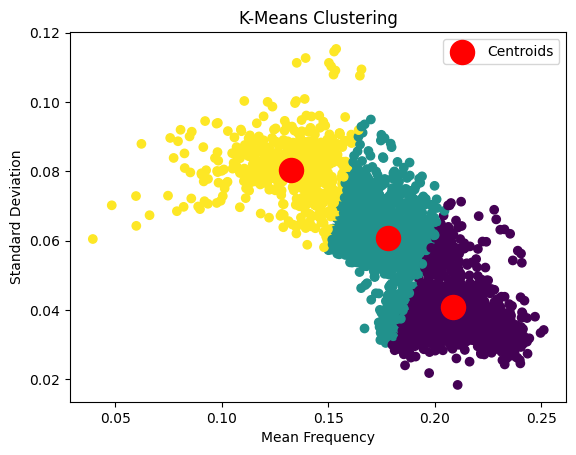

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['meanfreq', 'sd']]  # Replace with relevant feature columns

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster assignments and inertia
clusters = kmeans.labels_
inertia = kmeans.inertia_
print(f"K-Means Inertia: {inertia}")

# Silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Plot K-Means clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Mean Frequency')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


Too few clusters to calculate silhouette score.


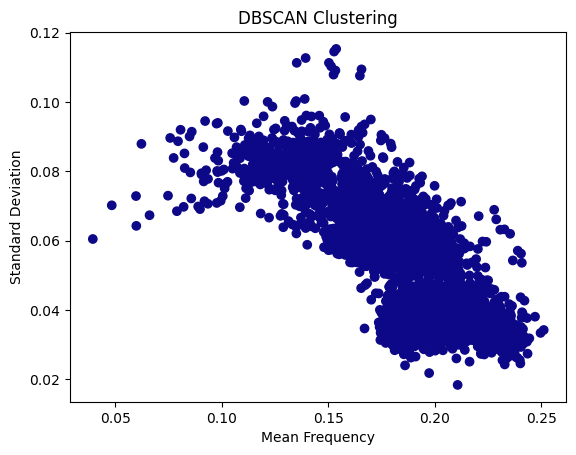

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['meanfreq', 'sd']]  # Replace with relevant feature columns

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Cluster assignments
dbscan_clusters = dbscan.labels_

# Silhouette score (if more than one cluster is found)
if len(set(dbscan_clusters)) > 1:
    silhouette_avg = silhouette_score(X, dbscan_clusters)
    print(f"DBSCAN Silhouette Score: {silhouette_avg}")
else:
    print("Too few clusters to calculate silhouette score.")

# Plot DBSCAN clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_clusters, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Mean Frequency')
plt.ylabel('Standard Deviation')
plt.show()
